# Workshop 1 - Descriptive Statistics & Histogram


Ricardo Andrés Cáceres Villibord

9 de Agosto del 2023

*Complete Workshop Instructions can be found at: https://rpubs.com/cdorante/tc3006c_w1*

---
### ***Import de las librerias***

In [105]:
#IMPORT THE 
import numpy as np
import pandas as pd
import yfinance as yf

### ***Descarga los Daily prices de Bitcoin desde 2017***

In [106]:
BTC=yf.download(tickers="BTC-USD", start="2017-01-01",interval="1d")

[*********************100%***********************]  1 of 1 completed


- **Show the content of the data**

In [107]:
print(BTC)

                    Open          High           Low         Close  \
Date                                                                 
2017-01-01    963.658020   1003.080017    958.698975    998.325012   
2017-01-02    998.617004   1031.390015    996.702026   1021.750000   
2017-01-03   1021.599976   1044.079956   1021.599976   1043.839966   
2017-01-04   1044.400024   1159.420044   1044.400024   1154.729980   
2017-01-05   1156.729980   1191.099976    910.416992   1013.380005   
...                  ...           ...           ...           ...   
2023-08-11  29424.902344  29517.773438  29253.517578  29397.714844   
2023-08-12  29399.787109  29465.113281  29357.587891  29415.964844   
2023-08-13  29416.593750  29441.433594  29265.806641  29282.914062   
2023-08-14  29283.263672  29660.253906  29124.105469  29408.443359   
2023-08-15  29399.732422  29439.121094  29099.738281  29169.585938   

               Adj Close       Volume  
Date                                   
2017-01-0

- ***Show the last quotations***

In [108]:
BTC.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-11,29424.902344,29517.773438,29253.517578,29397.714844,29397.714844,10195168197
2023-08-12,29399.787109,29465.113281,29357.587891,29415.964844,29415.964844,6194358008
2023-08-13,29416.593750,29441.433594,29265.806641,29282.914062,29282.914062,7329897180
2023-08-14,29283.263672,29660.253906,29124.105469,29408.443359,29408.443359,14013695304
2023-08-15,29399.732422,29439.121094,29099.738281,29169.585938,29169.585938,11751614464


### ***Import the matplotlib and do a plot for the Bitcoin closign prices***

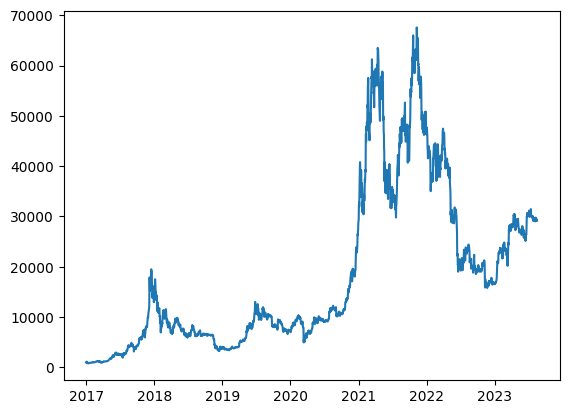

In [109]:
import matplotlib
from matplotlib.pyplot import *
plot(BTC["Adj Close"])
show()

- ***We can check the data types of each variable (column) in the dataset***

In [110]:
BTC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2418 entries, 2017-01-01 to 2023-08-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2418 non-null   float64
 1   High       2418 non-null   float64
 2   Low        2418 non-null   float64
 3   Close      2418 non-null   float64
 4   Adj Close  2418 non-null   float64
 5   Volume     2418 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 132.2 KB


### ***Promedio y std de la columna volumen***

PROMEDIO VOLUMEN:  22227915902.868484
STD Volumen:  19522888942.007263 



<AxesSubplot: >

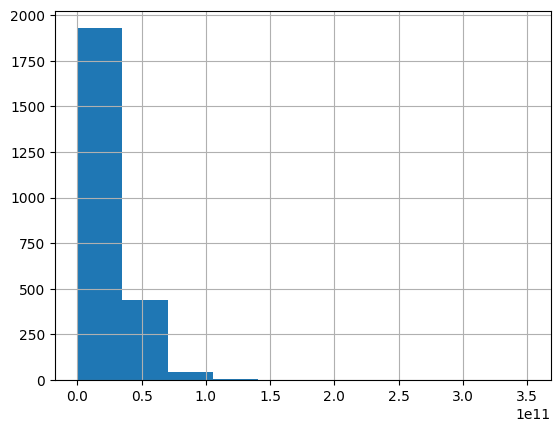

In [111]:
#promedio y std de la columna volumen
promedio_volumen = BTC["Volume"].mean()
std_volumen = BTC["Volume"].std()
print("PROMEDIO VOLUMEN: ",promedio_volumen)
print("STD Volumen: ", std_volumen, "\n")

#histogram
BTC["Volume"].hist()

### ***In Python we can get the previous value of a variable using the shift(n) function. This function works for Panda dataframes. Then we can calculate a new column for the simple returns of Bitcoin as follows:***

In [112]:
BTC["Return"] = (BTC["Adj Close"] / BTC["Adj Close"].shift(1)) - 1
print(BTC)

                    Open          High           Low         Close  \
Date                                                                 
2017-01-01    963.658020   1003.080017    958.698975    998.325012   
2017-01-02    998.617004   1031.390015    996.702026   1021.750000   
2017-01-03   1021.599976   1044.079956   1021.599976   1043.839966   
2017-01-04   1044.400024   1159.420044   1044.400024   1154.729980   
2017-01-05   1156.729980   1191.099976    910.416992   1013.380005   
...                  ...           ...           ...           ...   
2023-08-11  29424.902344  29517.773438  29253.517578  29397.714844   
2023-08-12  29399.787109  29465.113281  29357.587891  29415.964844   
2023-08-13  29416.593750  29441.433594  29265.806641  29282.914062   
2023-08-14  29283.263672  29660.253906  29124.105469  29408.443359   
2023-08-15  29399.732422  29439.121094  29099.738281  29169.585938   

               Adj Close       Volume    Return  
Date                                   

### ***Now we calculate cc returns in a new column using the shift function:***

In [113]:
BTC["r"] = np.log(BTC['Adj Close']) - np.log(BTC['Adj Close'].shift(1))
BTCR = BTC[['Return','r']].copy()

### ***We have a null value for the first day since we cannot calculate returns for day 1. We can drop the rows with NA values to ease data calculations:***

In [114]:
BTCR= BTCR.dropna()

### ***We can use the describe function applied to the r column as follows:***

In [115]:
sumret = BTC["Return"].describe()
sumret

count    2417.000000
mean        0.002179
std         0.039386
min        -0.371695
25%        -0.014606
50%         0.001470
75%         0.018931
max         0.252472
Name: Return, dtype: float64

### ***To know which days were the worse, we can do a selection based on a condition. Let’s see which days had a daily return less than 15%:***

In [116]:
#Worst days
BTCR[BTCR["Return"]<-0.15]

,Return,r
Date,,
2017-09-14,-0.187411,-0.207530
2018-01-16,-0.168548,-0.184582
2018-02-05,-0.159688,-0.173982
2020-03-12,-0.371695,-0.464730
2022-06-13,-0.159747,-0.174053


### ***To know the best days for Bitcoin:***

In [117]:
#Best Days
BTCR[BTCR["Return"]>0.15].sort_values(by=['Return'], ascending=False)

,Return,r
Date,,
2017-12-07,0.252472,0.225119
2017-07-20,0.239361,0.214596
2017-12-06,0.199283,0.181724
2021-02-08,0.187465,0.171821
2020-03-19,0.181878,0.167104
2019-04-02,0.173560,0.160042
2019-10-25,0.155763,0.144761
2017-07-17,0.154724,0.143862
2017-09-15,0.152956,0.142330


### ***We can also get the main descriptive statistics using specific functions like:***

In [118]:
print("The daily average return of Bitcoin is ", BTCR["r"].mean())
print("The daily variance of Bitcoin is ", BTCR["r"].var())
print("The daily standard deviation (volatility) of Bitcoin return is ", BTCR["r"].std())
print("The daily median return of Bitcoin is ",BTCR["r"].median())

The daily average return of Bitcoin is  0.0013962776090715792
The daily variance of Bitcoin is  0.0015734252722591291
The daily standard deviation (volatility) of Bitcoin return is  0.03966642499972904
The daily median return of Bitcoin is  0.0014686626299020844


---
## Challenge: Histogram

- Do a histogram for daily Bitcoin cc returns. Hints: use the plot.hist function for pandas dataframes, and the BTC dataframe.

- Interpret the histogram with your own words and in CAPITAL LETTERS


<AxesSubplot: title={'center': 'Historgram for Daily Bitcoin cc returns'}, ylabel='Frequency'>

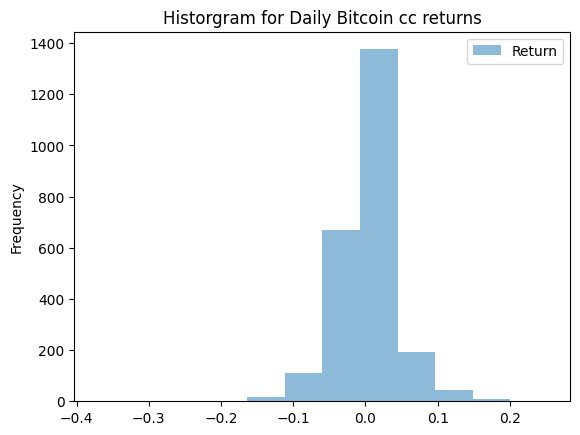

In [121]:
returnBTC = pd.DataFrame(BTCR[["Return"]])
returnBTC.plot.hist(bins=12,alpha=0.5,title="Historgram for Daily Bitcoin cc returns")

### `*CONCLUSIONES*`

EN EL HISTOGRAMA PODEMOS OBSERVAR QUE LA MAYORIA DE LOS DIAS SOLO HABIA GANANCIAS Y PERDIDAS DEL 0% AL 5%. SI HABIAN DIAS DONDE SE GANABA MAS O INCLUSO MAS DEL 0% A 5% PERO ESO ERA MUY RARO QUE OCURRIERA, YA QUE COMO PODEMOS OBSERVAR EN EL HISTOGRAMA ESTO NO PASA CON MUCHA FRECUENCIA. 

---
## Challenge: Simulating the Normal Distribution

- Use the mean and standard deviation of the historical cc returns of Bitcoin and simulate the same # of returns as the days we dowloaded in the BTCR dataframe.

- In one plot show both, the real distribution of historical cc returns and the simulated normal distribution

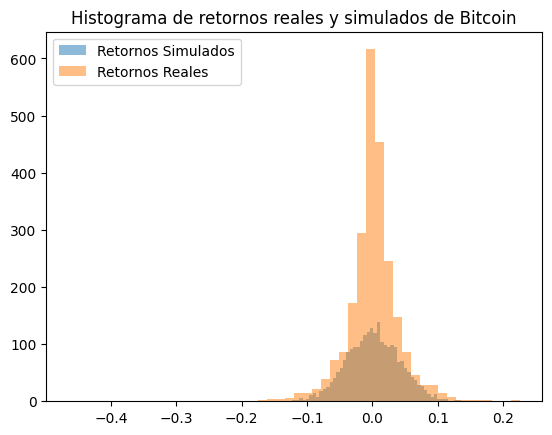

In [131]:
from matplotlib import pyplot
pyplot.clf()
returns_mean = BTCR["r"].mean()
returns_sd = BTCR["r"].std()
N = BTCR["r"].count()
simr= np.random.normal(loc=returns_mean, scale=returns_sd, size=N)
realr = BTCR["r"].to_numpy()

bins = 50

pyplot.hist(simr, bins, alpha = 0.5, label = 'Retornos Simulados')
pyplot.hist(realr, bins, alpha = 0.5, label = 'Retornos Reales')
pyplot.legend(loc='upper left')
pyplot.title(label='Histograma de retornos reales y simulados de Bitcoin')

pyplot.show()

- DO YOU SEE A DIFFERENCE BEWEEN THE REAL VS THE SIMULATED RETURNS? BRIEFLY EXPLAIN.

### `*Conclusiones*`

AL OBSERVAR EL HISTOGRAMA DE LOS RETORNOS REALES Y LOS RETORNOS SIMULADOS DE BITCOIN, NOS PODEMOS DAR CUENTA QUE EXISTE UNA DIFERENCIA MUY IMPORTANTE ENTRE LA SIMULACION Y LOS DATOS REALES. EN LOS RETORNOS REALES QUE TUVO EL BITCOIN, PODEMOS OBSERVAR QUE HUBIERON CAMBIOS BRUSCOS EN COMPARACIÓN A LA SIMULACIÓN LA CUAL EL BITCOIN TUVO UNA MENOR FRECUENCIA DE CAMBIO. CON ESTO PODEMOS DECIR QUE LOS DATOS SIMULADOS FUERON MAS ESTABLES QUE LO QUE PASO EN LA VIDA REAL.